In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.2 MB/s eta 0:00:00a 0:00:01


In [2]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import torch

sns.set_style('darkgrid')

%matplotlib inline

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


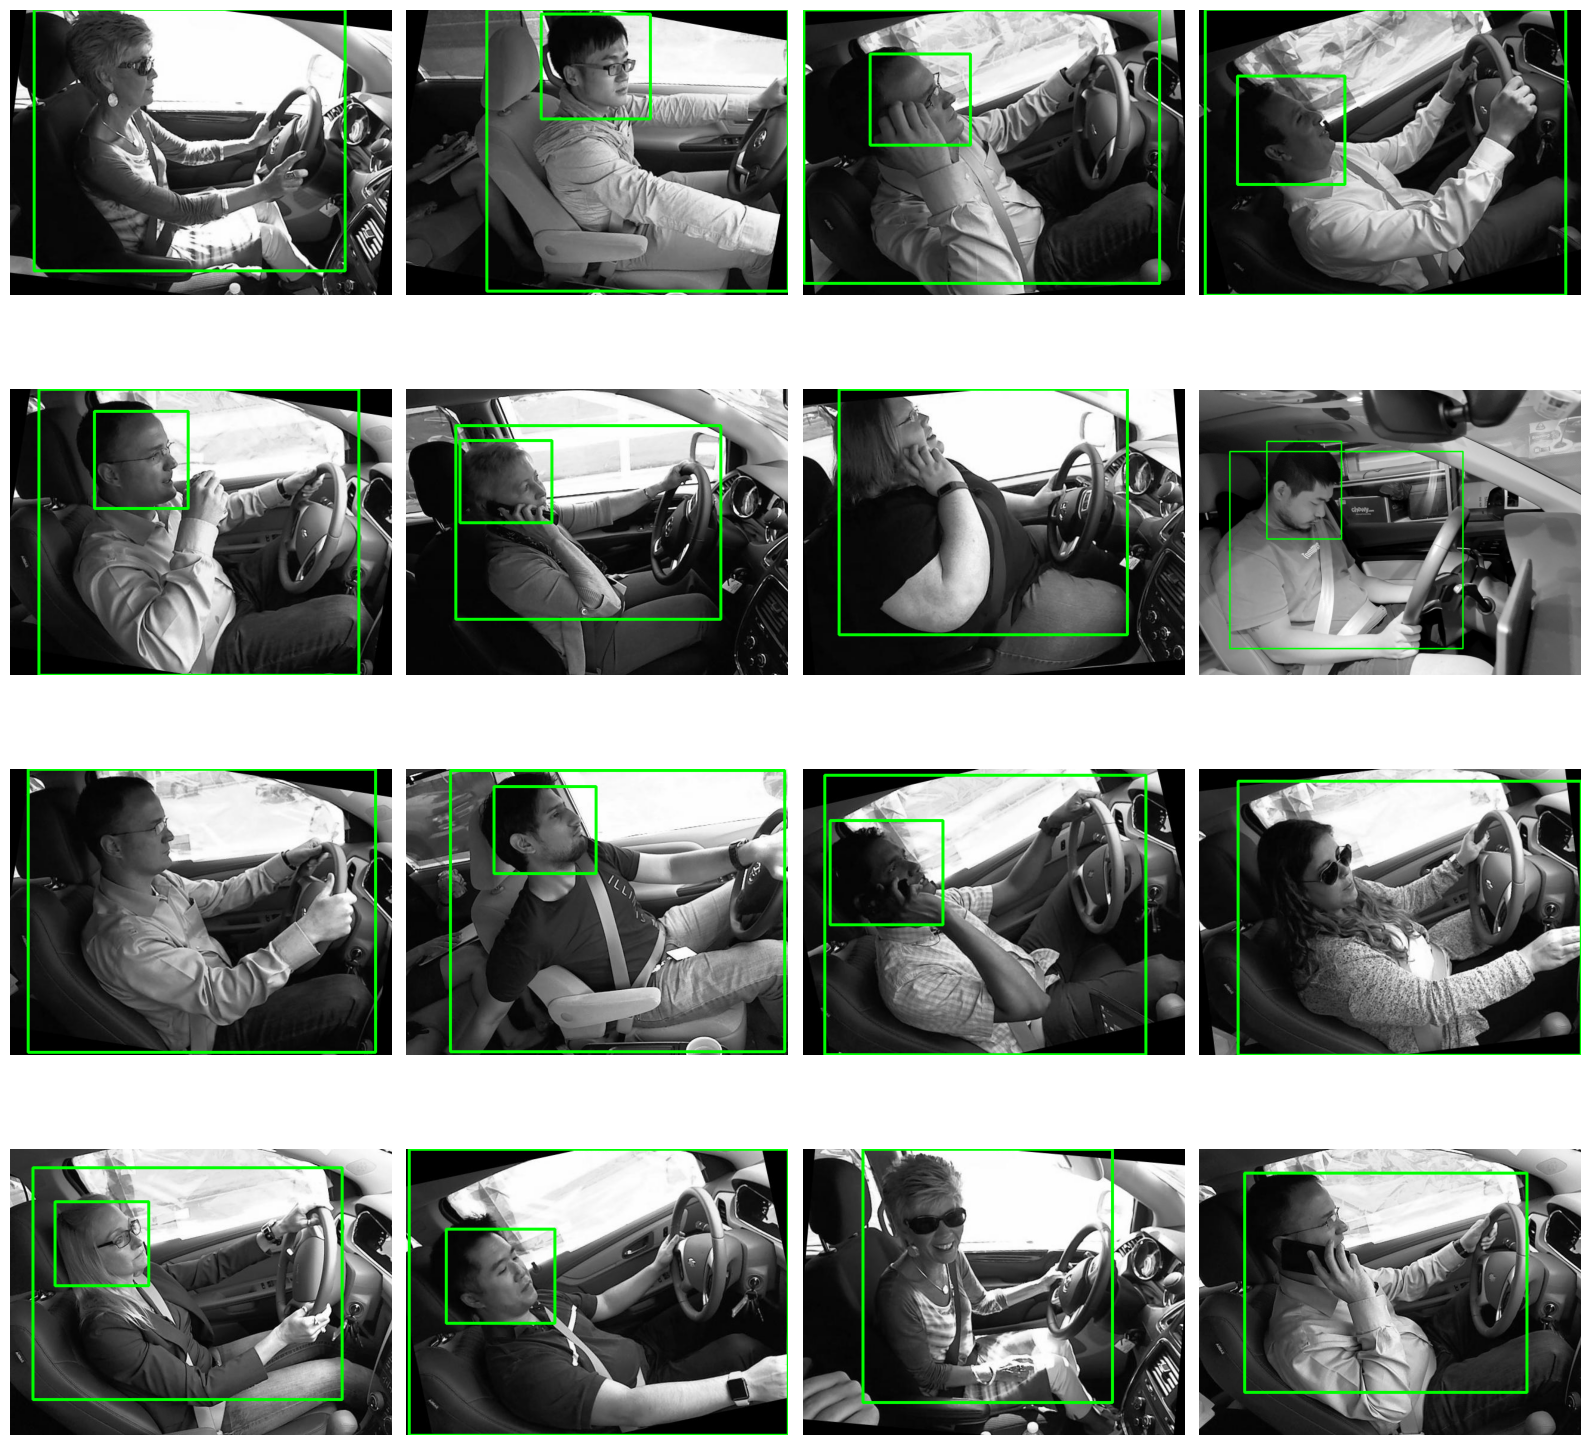

In [4]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/distracted-driving/Distracted Driving.v1i.yolov11/train/images"
train_labels = "/kaggle/input/distracted-driving/Distracted Driving.v1i.yolov11/train/labels"

test_images = "/kaggle/input/distracted-driving/Distracted Driving.v1i.yolov11/test/images"
test_labels = "/kaggle/input/distracted-driving/Distracted Driving.v1i.yolov11/test/labels"

val_images = "/kaggle/input/distracted-driving/Distracted Driving.v1i.yolov11/val/images"
val_labels = "/kaggle/input/distracted-driving/Distracted Driving.v1i.yolov11/val/labels"


# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    
    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    
    # Create a copy to draw on
    image_with_boxes = image_rgb.copy()
    
    try:
        with open(label_path, "r") as f:
            labels = f.read().strip().split("\n")
        
        # Loop over the labels and plot the object detections
        for label in labels:
            if not label or len(label.split()) != 5:
                continue
                
            class_id, x_center, y_center, width, height = map(float, label.split())
            
            # Convert normalized coordinates to pixel coordinates
            x_min = int((x_center - width/2) * image.shape[1])
            y_min = int((y_center - height/2) * image.shape[0])
            x_max = int((x_center + width/2) * image.shape[1])
            y_max = int((y_center + height/2) * image.shape[0])
            
            # Draw rectangle on the copy
            cv2.rectangle(image_with_boxes, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)
    
    except FileNotFoundError:
        print(f"Label file not found for {image_file}")
    
    # Show the image with the object detections
    axs[row, col].imshow(image_with_boxes)
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

In [5]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO("yolov10n.pt")

In [6]:
# Define the path where you want to save the data.yaml file
yaml_file_path = '/kaggle/working/data.yaml'

# Write the content to the YAML file
with open(yaml_file_path, 'w') as f:
    f.write("""# Dataset Configuration
Path: /kaggle/input/distracted-driving/Distracted Driving.v1i.yolov11
train: /kaggle/input/distracted-driving/Distracted Driving.v1i.yolov11/train/images
val: /kaggle/input/distracted-driving/Distracted Driving.v1i.yolov11/val/images
test: /kaggle/input/distracted-driving/Distracted Driving.v1i.yolov11/test/images
nc: 12
names: ['c0 - Safe Driving', 'c1 - Texting', 'c2 - Talking on the phone', 'c3 - Operating the Radio', 
        'c4 - Drinking', 'c5 - Reaching Behind', 'c6 - Hair and Makeup', 'c7 - Talking to Passenger', 
        'd0 - Eyes Closed', 'd1 - Yawning', 'd2 - Nodding Off', 'd3 - Eyes Open']

roboflow:
  workspace: flytech
  project: distracted-driving-v2wk5-f5vtj
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/flytech/distracted-driving-v2wk5-f5vtj/dataset/1

""")


In [7]:
import torch

# Free up GPU memory
torch.cuda.empty_cache()


# Train the model
model.train(
    data='/kaggle/working/data.yaml',
    epochs=25,        # Number of training epochs
    imgsz=640,        # Image size
    device=0,         # Use GPU 0
    optimizer="SGD",# Optimizer
    lr0=0.01)       # Initial learning rate


Ultralytics 8.3.220 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2238       3813       0.97      0.959      0.985      0.837
     c0 - Safe Driving        240        240      0.928      0.988      0.984      0.883
          c1 - Texting        268        268      0.985      0.993      0.994      0.921
c2 - Talking on the phone        291        291      0.997      0.991      0.995       0.84
c3 - Operating the Radio        245        245       0.98      0.992      0.988      0.941
         c4 - Drinking        269        269          1      0.995      0.995      0.905
  c5 - Reaching Behind        260        260      0.996      0.998      0.995      0.916
  c6 - Hair and Makeup        297        297      0.992          1      0.994      0.907
c7 - Talking to Passenger        208        208      0.974      0.897      0.982      0.922
      d0 - Eyes Closed        378        379      0.903       0.79      0.932      0.596
          d1 - Yawning         80         80      0.956      0.975       0.99       0.71
      d2 - No

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7edb98539cc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

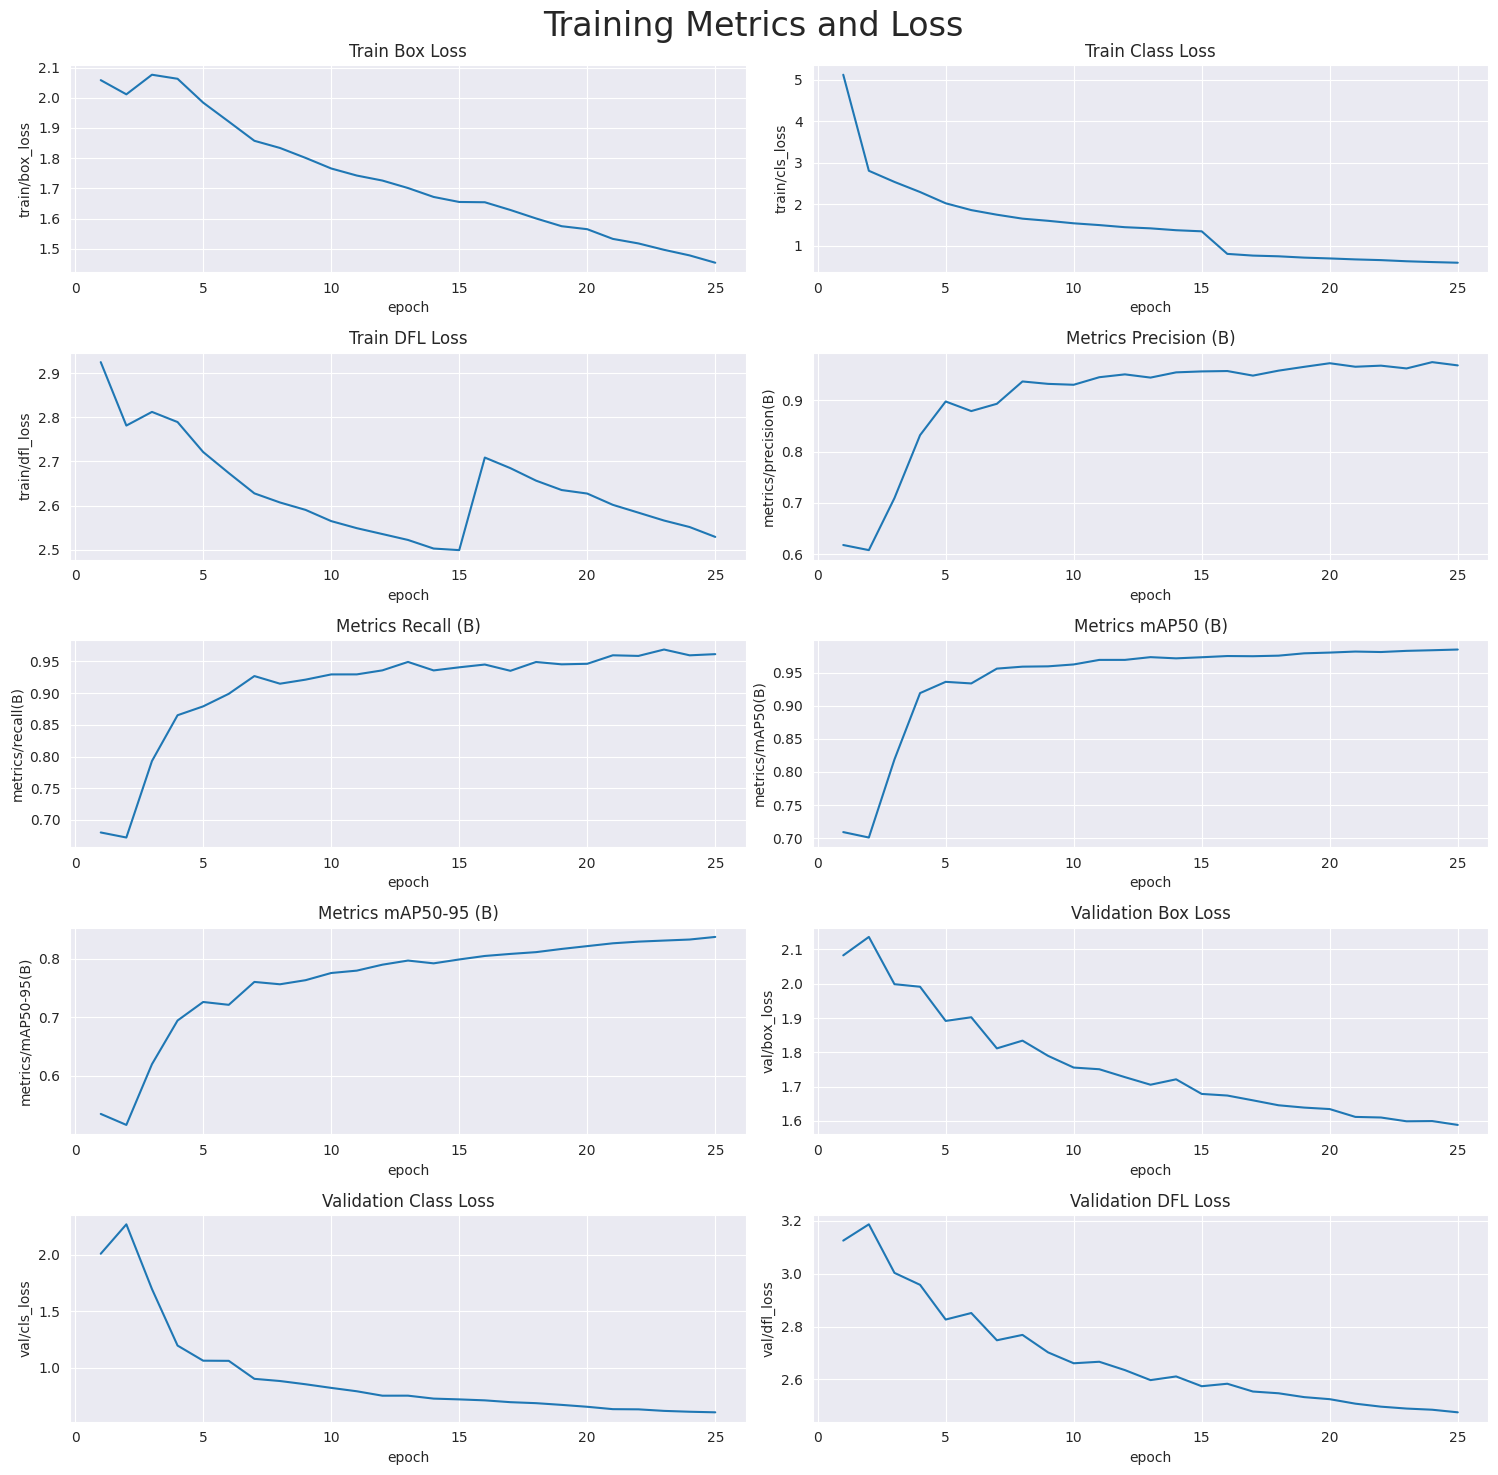

In [8]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [9]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics 8.3.220 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 102 layers, 2,267,508 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8.4±0.6 MB/s, size: 34.9 KB)
val: Scanning /kaggle/input/distracted-driving/Distracted Driving.v1i.yolov11/test/labels... 2240 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2240/2240 247.5it/s 9.0s0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/distracted-driving/Distracted Driving.v1i.yolov11/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 140/140 8.6it/s 16.2s0.2s


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all       2240       3792      0.967      0.964      0.978      0.845
     c0 - Safe Driving        233        233      0.919      0.987      0.976      0.893
          c1 - Texting        257        257      0.994      0.996      0.991      0.923
c2 - Talking on the phone        275        275      0.994      0.989      0.995      0.856
c3 - Operating the Radio        262        262      0.996          1      0.995      0.955
         c4 - Drinking        290        290      0.995      0.986      0.995      0.916
  c5 - Reaching Behind        288        288      0.989          1      0.993      0.932
  c6 - Hair and Makeup        276        276      0.988      0.993      0.995      0.916
c7 - Talking to Passenger        202        202      0.978      0.931      0.962      0.909
      d0 - Eyes Closed        363        363      0.898      0.802      0.892       0.61
          d1 - Yawning         74         74      0.936      0.986      0.989      0.715
      d2 - No

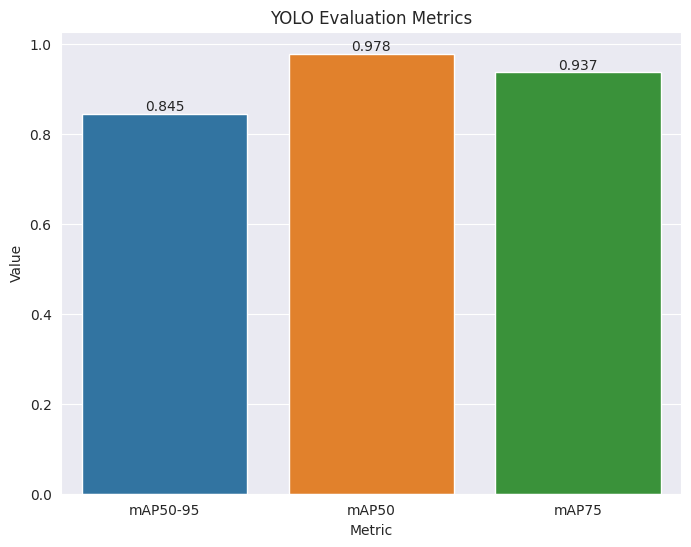

In [10]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

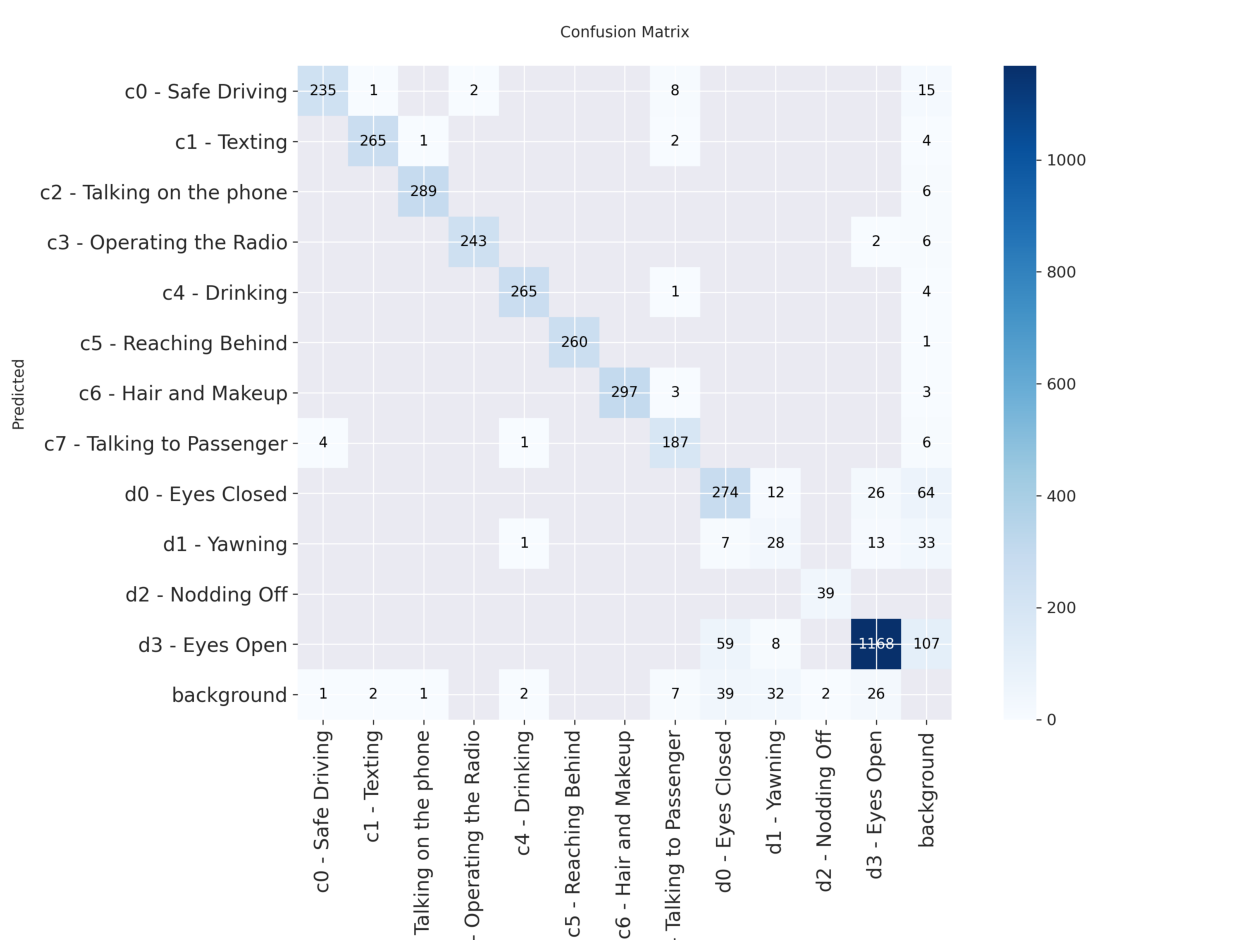

In [11]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (16, 16))

ax.imshow(img)
ax.axis('off');

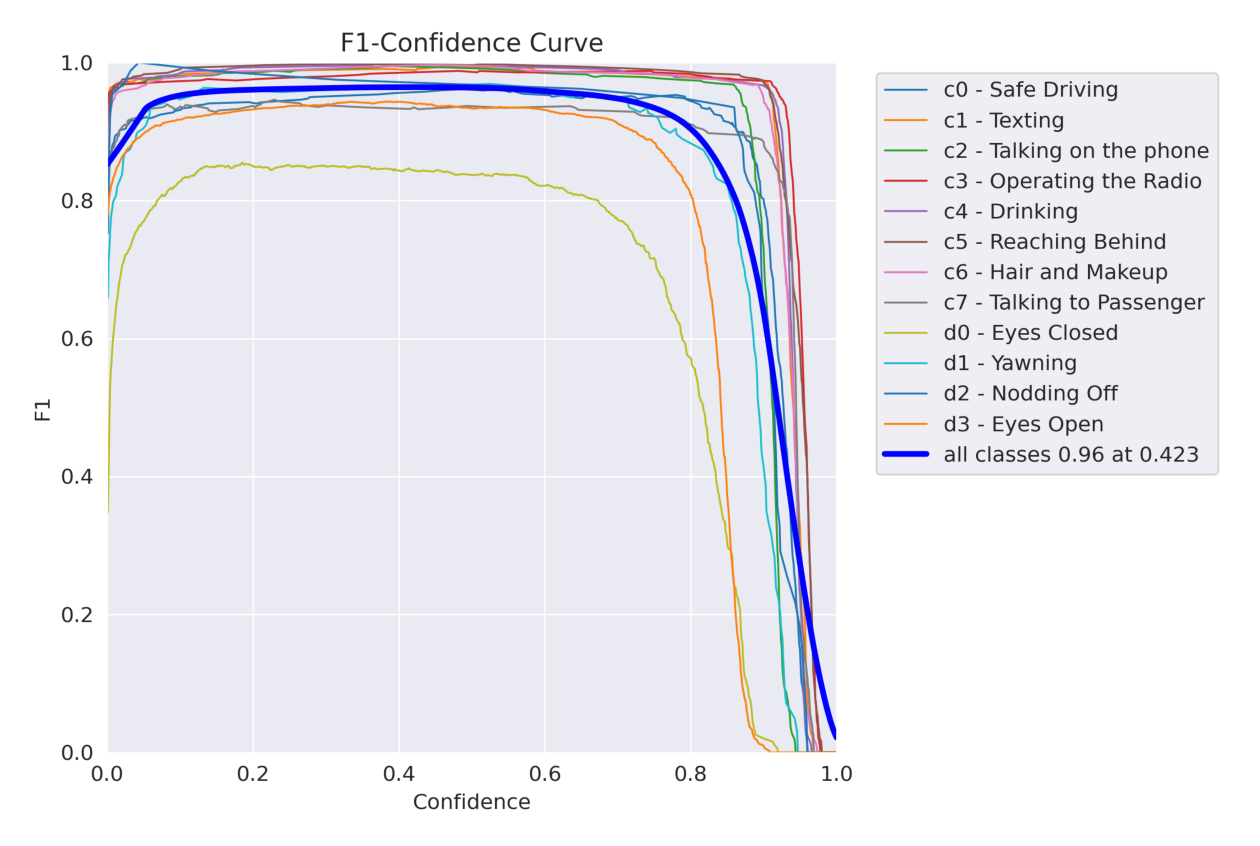

In [12]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/kaggle/working/runs/detect/train/BoxF1_curve.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (16, 16))

ax.imshow(img)
ax.axis('off');

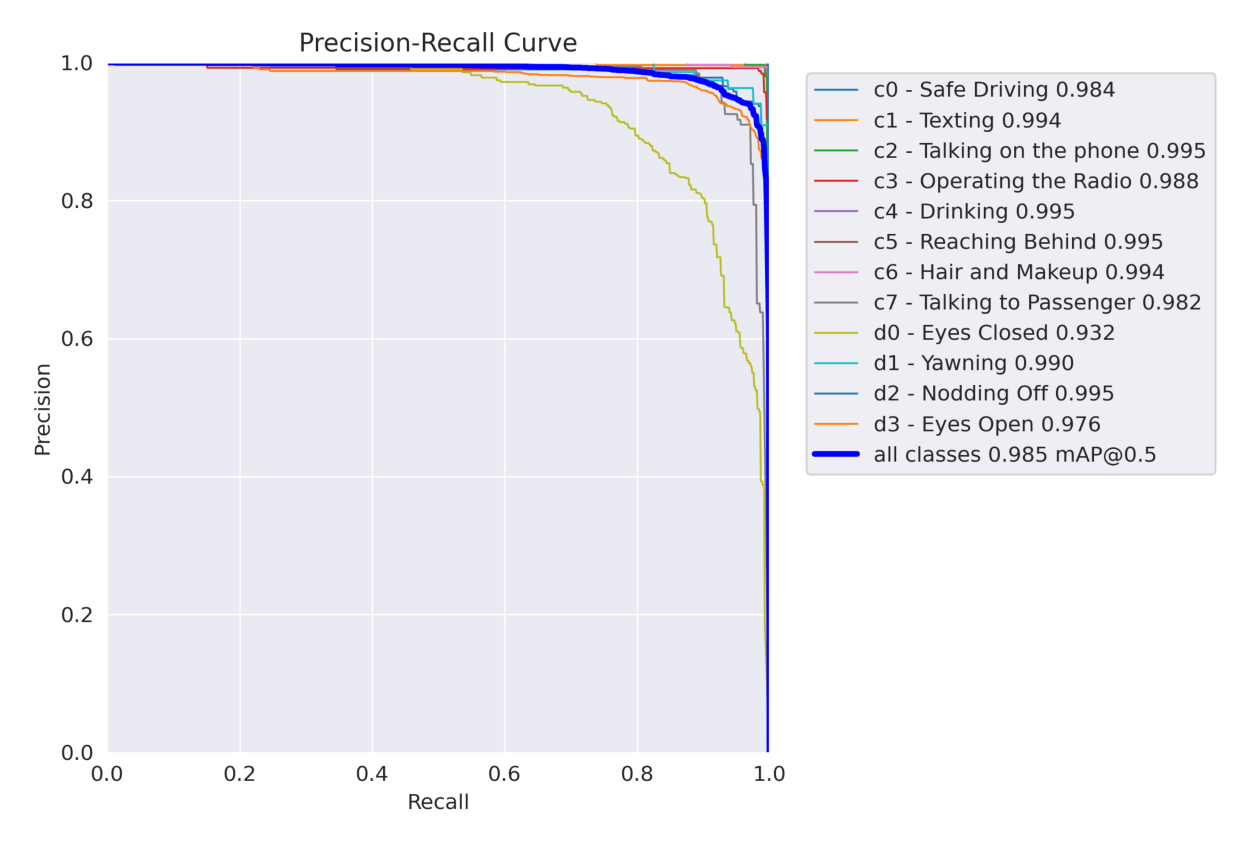

In [13]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/kaggle/working/runs/detect/train/BoxPR_curve.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (16, 16))

ax.imshow(img)
ax.axis('off');

In [14]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 480x640 1 c2 - Talking on the phone, 1 d3 - Eyes Open, 43.4ms
Speed: 1.3ms preprocess, 43.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 c4 - Drinking, 8.4ms
Speed: 2.7ms preprocess, 8.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 c2 - Talking on the phone, 1 d3 - Eyes Open, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 c1 - Texting, 9.1ms
Speed: 1.6ms preprocess, 9.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 c4 - Drinking, 1 d3 - Eyes Open, 9.6ms
Speed: 1.6ms preprocess, 9.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 c1 - Texting, 1 d0 - Eyes Closed, 8.5ms
Speed: 1.5ms preprocess, 8.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 c4 - Drinking, 1 d3 - Eyes Open, 9.2ms
Speed: 1.6ms preprocess, 9.2ms inference, 0.4ms postprocess per

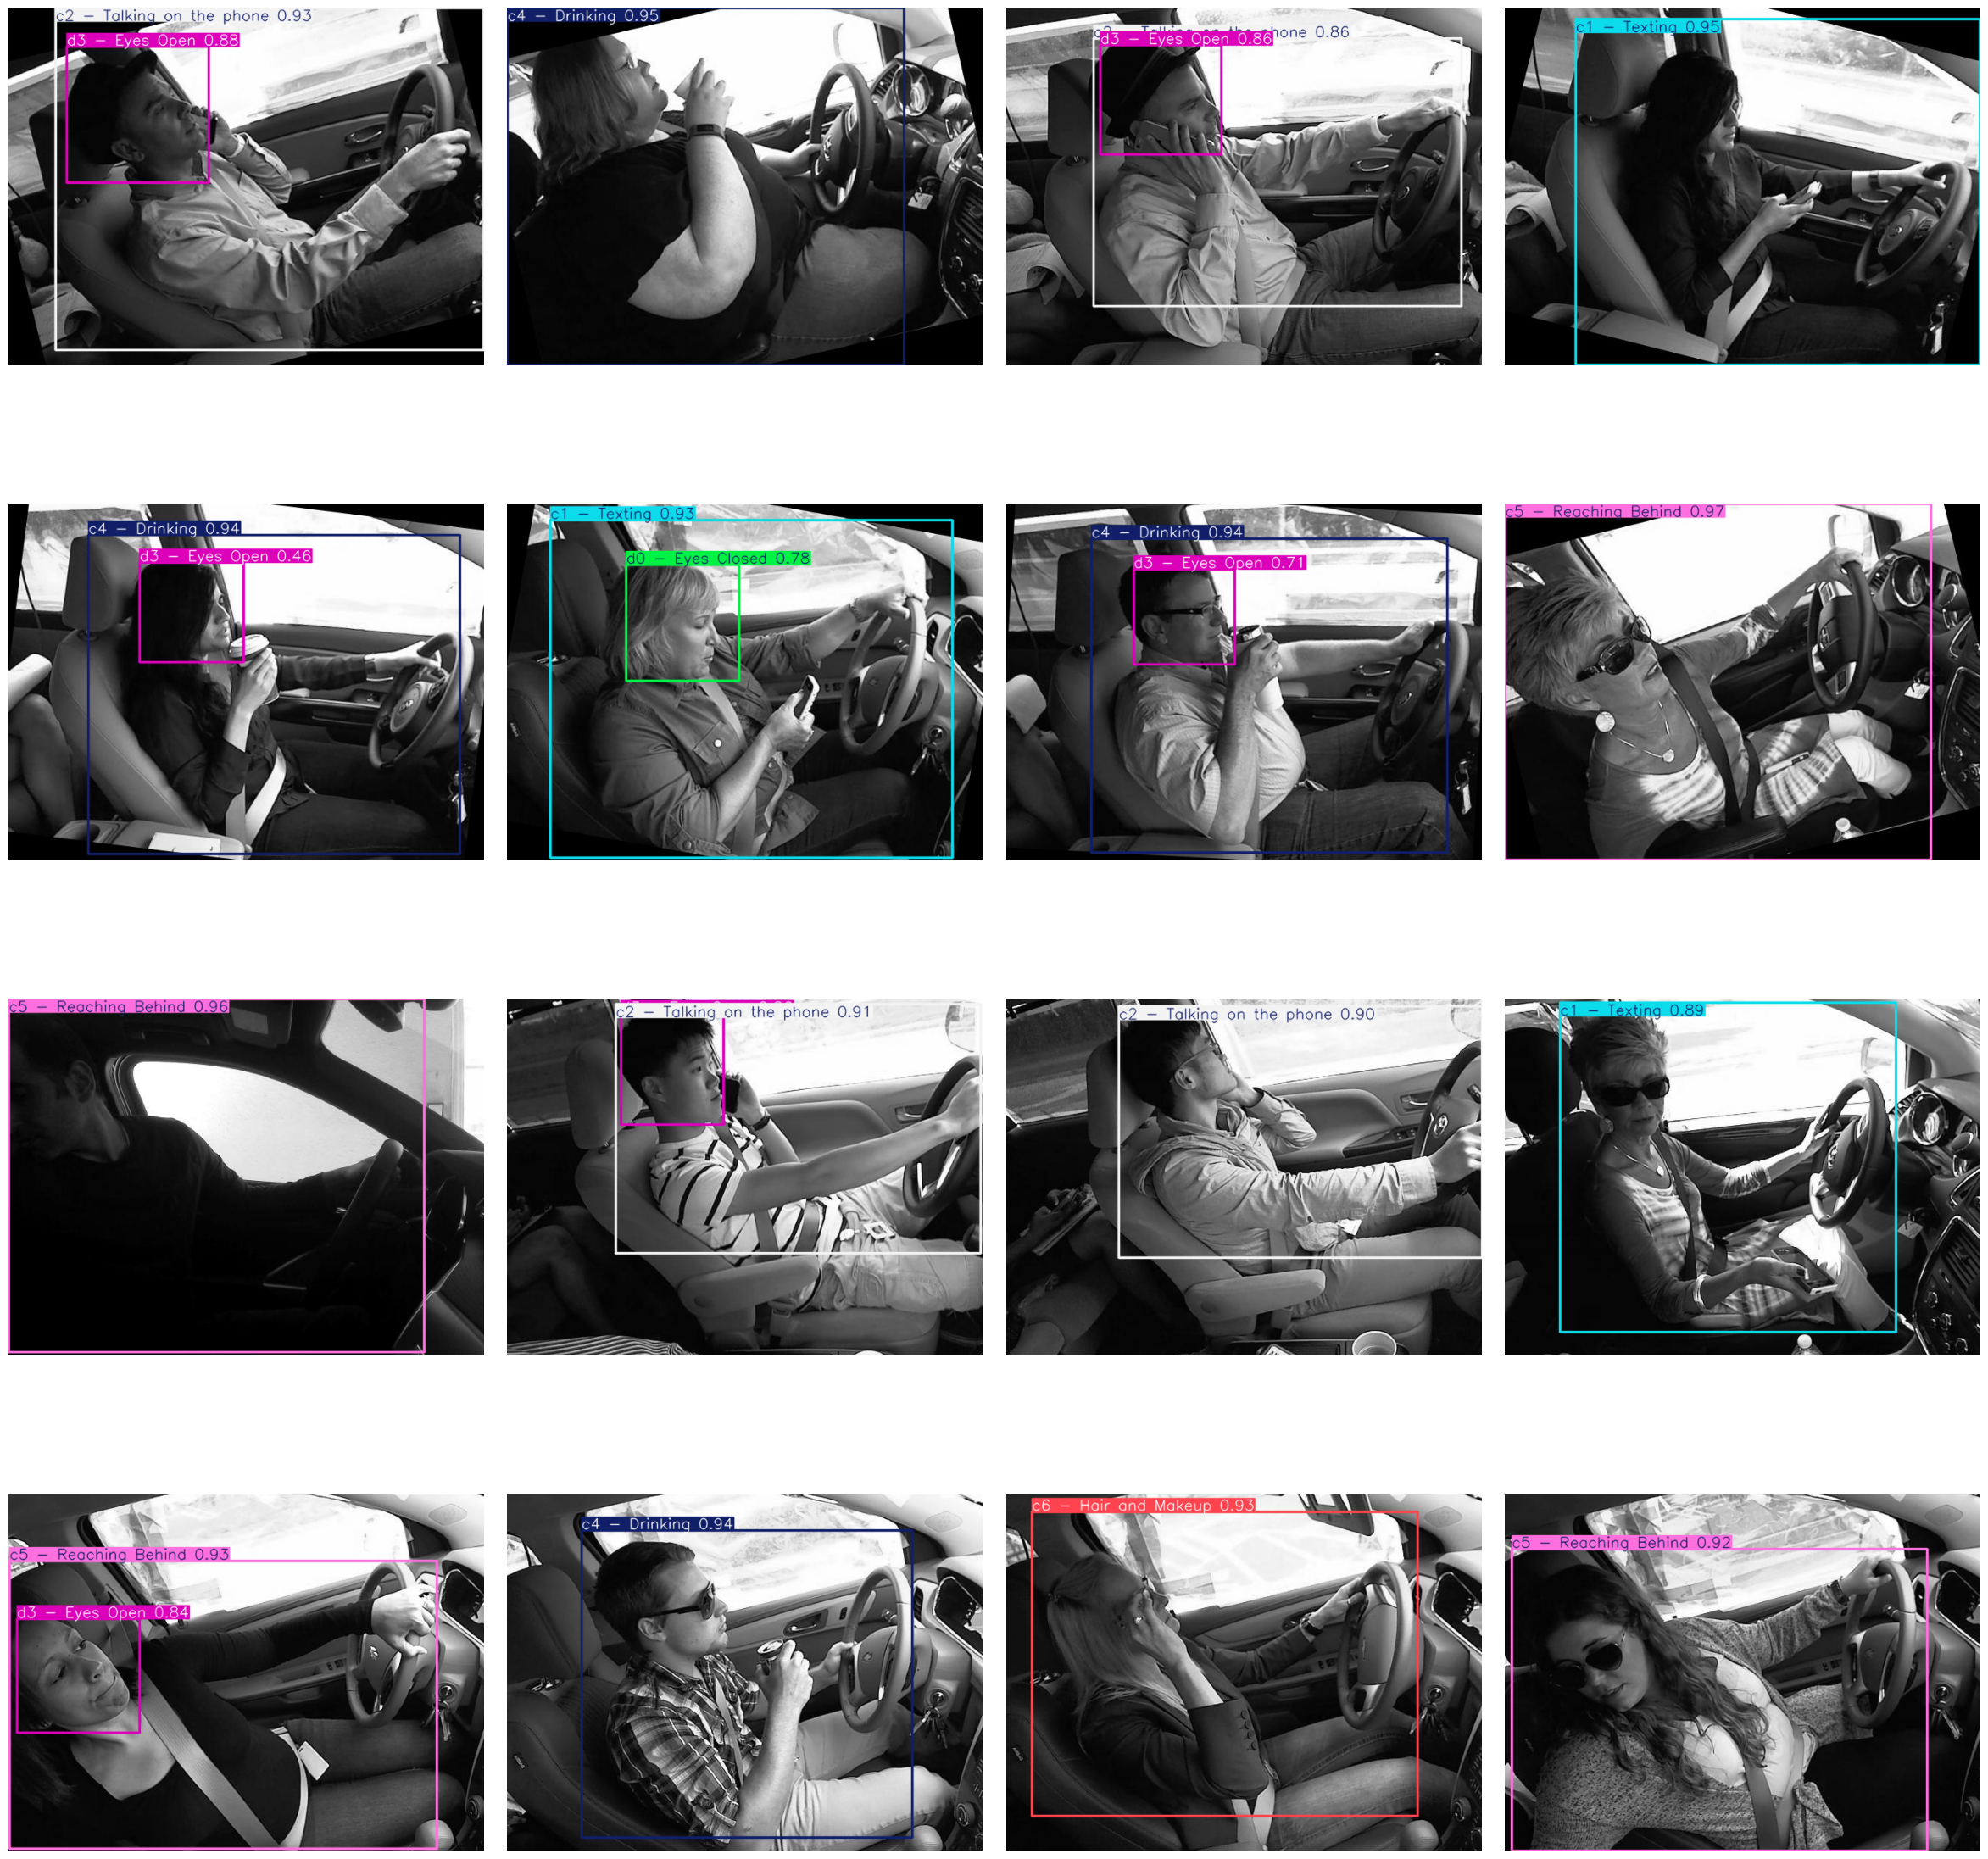

In [15]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/distracted-driving/Distracted Driving.v1i.yolov11/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(30,30))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# Quantized ONNX


In [16]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

# Export to ONNX
model.export(format="onnx", opset=12)


Ultralytics 8.3.220 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLOv10n summary (fused): 102 layers, 2,267,508 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from '/kaggle/working/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.5 MB)
requirements: Ultralytics requirements ['onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 5.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 12...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success ✅ 7.0s, saved as '/kaggle/working/runs/detect/train/weights/best.onnx' (8.9 MB)

Export complete (7.4s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:       

'/kaggle/working/runs/detect/train/weights/best.onnx'

In [19]:
from onnxruntime.quantization import quantize_dynamic, QuantType

# Correct full path to ONNX
model_fp32 = "/kaggle/working/runs/detect/train/weights/best.onnx"
model_int8 = "/kaggle/working/runs/detect/train/weights/best_quantized.onnx"

# Perform dynamic quantization
quantize_dynamic(
    model_fp32,
    model_int8,
    weight_type=QuantType.QInt8
)

print("✅ Quantized model saved as:", model_int8)


✅ Quantized model saved as: /kaggle/working/runs/detect/train/weights/best_quantized.onnx
